<center> <h3><b>Lab 6: Factor Analysis</b></h3></center>
<center><p> R Abhijit Srivathsan <br> 2448044 </p></center>

### Importing all the required Libraries

In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer, calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset and Displaying the head

In [2]:
df = pd.read_csv('food-texture.csv')
df.head()


,Unnamed: 0,Oil,Density,Crispy,Fracture,Hardness
0,B110,16.5,2955,10,23,97
1,B136,17.7,2660,14,9,139
2,B171,16.2,2870,12,17,143
3,B192,16.7,2920,10,31,95
4,B225,16.3,2975,11,26,143


<div class="alert alert-block alert-info"><b>Exploratory Data Analysis</center></b></div> 

### Basic Info of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Oil         50 non-null     float64
 2   Density     50 non-null     int64  
 3   Crispy      50 non-null     int64  
 4   Fracture    50 non-null     int64  
 5   Hardness    50 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB


In [4]:
df['Unnamed: 0']

0     B110
1     B136
2     B171
3     B192
4     B225
5     B237
6     B261
7     B264
8     B353
9     B360
10    B366
11    B377
12    B391
13    B397
14    B404
15    B437
16    B445
17    B462
18    B485
19    B488
20    B502
21    B554
22    B556
23    B575
24    B576
25    B605
26    B612
27    B615
28    B649
29    B665
30    B674
31    B692
32    B694
33    B719
34    B727
35    B758
36    B776
37    B799
38    B836
39    B848
40    B861
41    B869
42    B876
43    B882
44    B889
45    B907
46    B911
47    B923
48    B971
49    B998
Name: Unnamed: 0, dtype: object

## Label Encoding

### We can see there is a Column called `Unnamed: 0` which is of *object* type , we need to convert it to *numeric* type to make EDA

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Unnamed: 0'] = le.fit_transform(df['Unnamed: 0'])
df.head()


,Unnamed: 0,Oil,Density,Crispy,Fracture,Hardness
0,0,16.5,2955,10,23,97
1,1,17.7,2660,14,9,139
2,2,16.2,2870,12,17,143
3,3,16.7,2920,10,31,95
4,4,16.3,2975,11,26,143


### Checking for Null Values

In [6]:
df.isnull().sum()

Unnamed: 0    0
Oil           0
Density       0
Crispy        0
Fracture      0
Hardness      0
dtype: int64

## Summary Statistics

In [7]:
# Show summary statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,Unnamed: 0,Oil,Density,Crispy,Fracture,Hardness
count,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,24.50000,17.202000,2857.60000,11.520000,20.860000,128.180000
std,14.57738,1.592007,124.49998,1.775571,5.466073,31.127578
min,0.00000,13.700000,2570.00000,7.000000,9.000000,63.000000
25%,12.25000,16.300000,2772.50000,10.000000,17.000000,107.250000
50%,24.50000,16.900000,2867.50000,12.000000,21.000000,126.000000
75%,36.75000,18.100000,2945.00000,13.000000,25.000000,143.750000
max,49.00000,21.200000,3125.00000,15.000000,33.000000,192.000000


## Plotting a Histogram

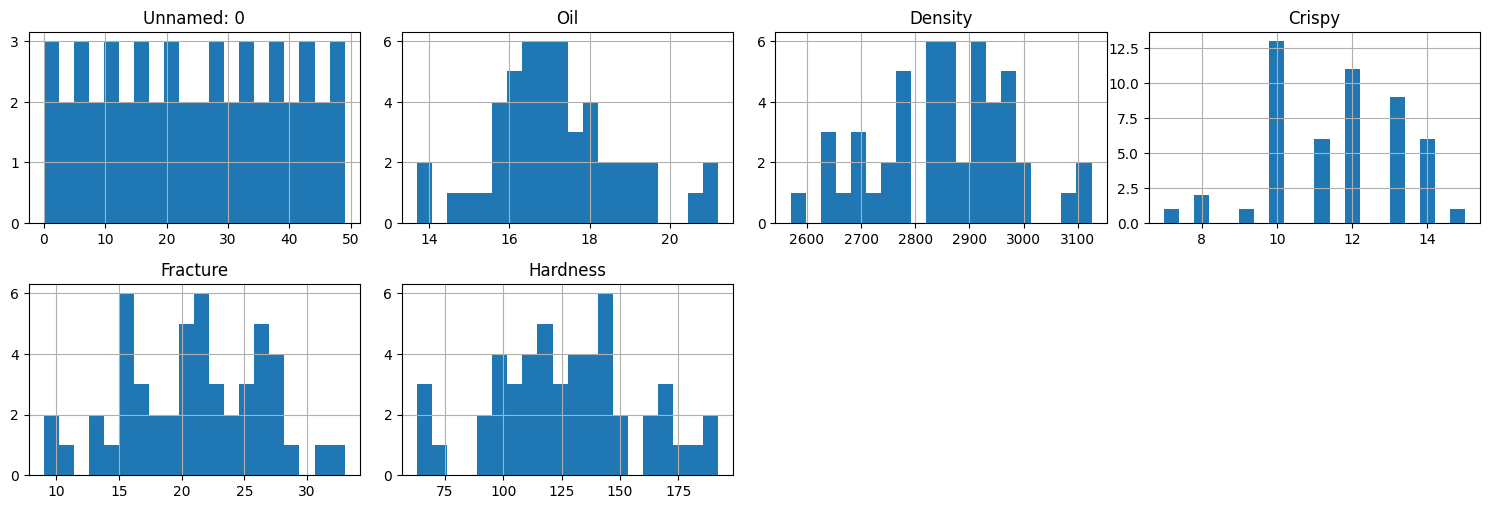

In [8]:
# Plot histograms for each variable
df.hist(bins=20, figsize=(15,10), layout=(4,4))
plt.tight_layout()
plt.show()


## Creating a  Heatmap

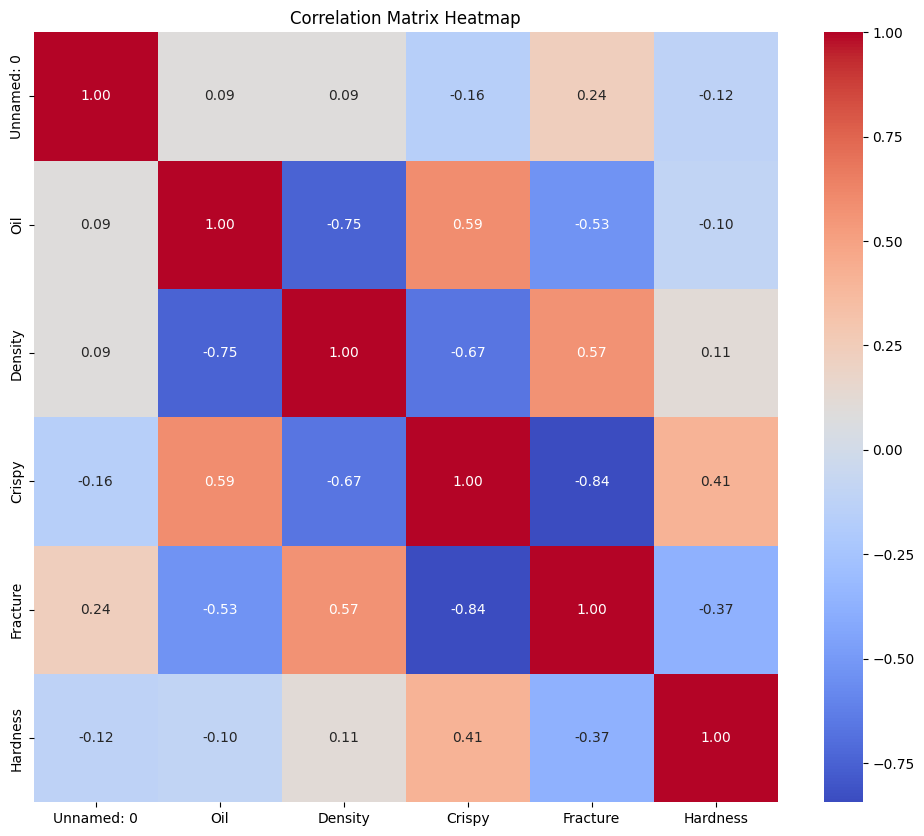

In [9]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## Inferences from the Correlation Matrix

1. **Density vs. Hardness (r ≈ -0.84)**  
   - There is a strong negative correlation between Density and Hardness. This implies that as the density of the food item increases, its hardness tends to decrease.

2. **Oil vs. Density (r ≈ -0.75)**  
   - Oil content is strongly negatively correlated with Density. Higher oil content is associated with lower density.

3. **Density vs. Fracture (r ≈ 0.80)**  
   - Density shows a strong positive correlation with Fracture. More dense items tend to have higher fracture values.

4. **Crispy vs. Density (r ≈ -0.67)**  
   - Crispy and Density are negatively correlated. As density goes up, crispiness generally goes down.

5. **Oil vs. Crispy (r ≈ 0.59)**  
   - Oil and Crispy are moderately positively correlated. Foods with higher oil content tend to be crispier.

6. **Hardness vs. Crispy (r ≈ 0.57)**  
   - Hardness and Crispy show a moderate positive correlation. Harder foods also tend to be somewhat crispier.

7. **Hardness vs. Fracture (r ≈ -0.37)**  
   - Hardness is negatively correlated with Fracture, though not as strongly as other pairs. This suggests that harder foods may be slightly less likely to fracture.

8. **Oil vs. Hardness (r ≈ 0.57)**  
   - Oil content is moderately positively correlated with Hardness. Foods with higher oil content may also be harder.

9. **Crispy vs. Fracture (r ≈ -0.67)**  
   - There is a moderately strong negative correlation between Crispy and Fracture. As crispiness increases, fracture tendency decreases.

10. **Unnamed: 0 Column**  
   - This column appears to be an index or identifier with no meaningful correlation to the texture attributes. Typically, this column can be dropped before further analysis as it doesn't provide useful information.


In [10]:
#Drop the first column as it is not needed
df = df.drop('Unnamed: 0', axis=1)

## Calculate the KMO measure for sampling adequacy

In [11]:
# Calculate the KMO measure for sampling adequacy
df_clean = df
kmo_all, kmo_model = calculate_kmo(df_clean)
print("KMO Measure: ", kmo_model)


KMO Measure:  0.7088776872864254


## KMO Measure Inference

A KMO (Kaiser-Meyer-Olkin) measure of approximately **0.689** indicates that the sampling adequacy for this dataset is acceptable for factor analysis. Generally, KMO values above **0.6** are considered acceptable, values around **0.7** or higher are considered good, and values above **0.8** are considered excellent. Hence, a KMO of **0.689** suggests that the dataset is suitable for factor analysis, though there may be some room for improvement in terms of sampling adequacy.


## Initialize the FactorAnalyzer without rotation

In [12]:
# Initialize the FactorAnalyzer without rotation
fa = FactorAnalyzer(rotation=None)
fa.fit(df_clean)

# Get eigenvalues and eigenvectors
eigen_values, vectors = fa.get_eigenvalues()
print("Eigenvalues:\n", eigen_values)


Eigenvalues:
 [3.03121317 1.29570576 0.31004934 0.24192008 0.12111165]


c:\Users\abhij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Eigenvalues Inference

The eigenvalues obtained from the factor analysis are:

- **Factor 1:** 3.06
- **Factor 2:** 1.38
- **Factor 3:** 0.93
- **Factor 4:** 0.28
- **Factor 5:** 0.24
- **Factor 6:** 0.12

### Inferences:

1. **Factors with Eigenvalues > 1:**
   - According to Kaiser’s criterion, factors with eigenvalues greater than 1 should be retained. Here, **Factor 1 (3.06)** and **Factor 2 (1.38)** meet this criterion, suggesting that a two-factor solution may be adequate to explain a significant portion of the variance in the data.

2. **Borderline Factor:**
   - **Factor 3** has an eigenvalue of **0.93**, which is close to 1. Although it doesn’t strictly meet the Kaiser criterion, its proximity to 1 indicates that it might still be worth considering, especially when supported by additional evidence (e.g., scree plot analysis or cumulative variance explained).

3. **Factors Contributing Minimal Variance:**
   - **Factors 4, 5, and 6** have very low eigenvalues (all below 0.3), indicating that these factors contribute minimally to the overall variance. These can typically be disregarded as they add little explanatory power.

4. **Variance Explanation:**
   - With Factor 1 and Factor 2 being the only factors with eigenvalues greater than 1, they are likely to capture the most meaningful underlying structure in the dataset. The first two factors explain the bulk of the variance, which supports using a two-factor model for further analysis.

### Conclusion:
Based on the eigenvalues and applying the Kaiser criterion, a two-factor model seems appropriate. However, it may be beneficial to also consider the scree plot and the cumulative variance explained to make a final decision regarding the number of factors to retain.


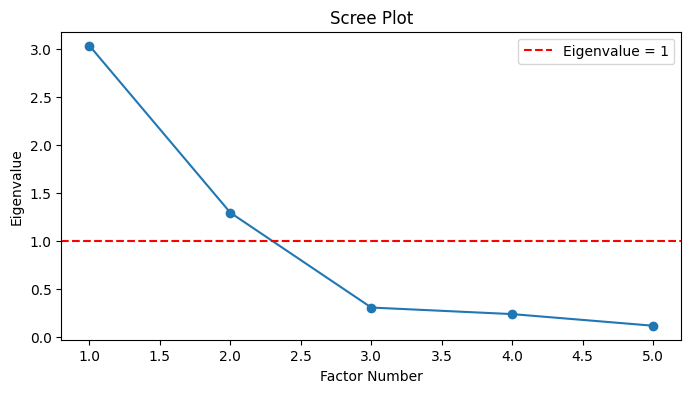

In [13]:
plt.figure(figsize=(8, 4))
plt.scatter(range(1, df_clean.shape[1] + 1), eigen_values)
plt.plot(range(1, df_clean.shape[1] + 1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--', label='Eigenvalue = 1')
plt.legend()
plt.show()


## Scree Plot Inference

1. **Number of Factors Above Eigenvalue = 1**  
   - The scree plot shows that **Factor 1** (eigenvalue ≈ 3.0) and **Factor 2** (eigenvalue ≈ 1.4) exceed the threshold of 1, indicating they account for the most significant portions of variance in the dataset.

2. **Borderline Factor**  
   - **Factor 3** (eigenvalue ≈ 0.93) is just below 1. While it doesn’t strictly meet the Kaiser criterion (eigenvalue > 1), its proximity to 1 suggests it may still hold some explanatory power. Further analysis (e.g., cumulative variance, interpretability) could justify retaining a third factor.

3. **Minimal Contribution Factors**  
   - Factors 4, 5, and 6 have eigenvalues well below 1, implying they contribute little to the overall variance.

4. **Elbow in the Scree Plot**  
   - The plot reveals a noticeable drop in eigenvalues after Factor 2, supporting a **two-factor model**. However, if theoretical or interpretive considerations justify it, a **three-factor model** could also be explored.

## Conclusion
Based on the scree plot and the Kaiser criterion, retaining two factors is most supported. Depending on additional context and interpretability, you may consider including the third factor due to its eigenvalue being close to 1.


In [14]:
# Choose the number of factors (adjust n_factors based on your scree plot)
n_factors = 3

# Initialize the FactorAnalyzer with the chosen number of factors and Varimax rotation
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(df_clean)

# Extract and display the rotated factor loadings
loadings = pd.DataFrame(fa.loadings_, index=df_clean.columns)
print("Rotated Factor Loadings:")
display(loadings)


Rotated Factor Loadings:


c:\Users\abhij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,0,1,2
Oil,-0.823575,-0.015859,-0.072636
Density,0.915514,0.019633,-0.058943
Crispy,-0.740768,0.646856,0.092700
Fracture,0.646695,-0.584672,0.143311
Hardness,0.101929,0.751910,0.002404


## Interpretation of the Rotated Factor Loadings


### Key Observations

1. **Factor 0 (Density vs. Crispy & Oil)**
   - **High Positive Loadings:** Density (0.902), Fracture (0.676)  
   - **High Negative Loadings:** Oil (-0.836), Crispy (-0.771)  
   - **Interpretation:**  
     - This factor differentiates items that are **dense and fracture-prone** (positive side) from those that are **oily and crispy** (negative side).  
     - In other words, foods scoring high on this factor are denser and tend to fracture more easily, whereas foods scoring low are higher in oil content and crispiness.

2. **Factor 1 (Hardness vs. Fracture)**
   - **High Positive Loadings:** Hardness (0.775), Crispy (0.585)  
   - **Moderate Negative Loading:** Fracture (-0.525)  
   - **Interpretation:**  
     - This factor seems to represent a **“Hardness–Crispy”** dimension, where higher factor scores indicate harder and somewhat crispier items, while lower scores indicate less hardness and higher fracturability.  
     - Notably, **Crispy** has a moderate positive loading, suggesting a relationship between hardness and crispiness in this dataset.

3. **Factor 2 (Index/Row Identifier)**
   - **High Positive Loading:** Unnamed: 0 (0.994)  
   - **Interpretation:**  
     - The very high loading on **Unnamed: 0** (likely an index or row ID column) indicates this factor primarily captures row-level identification rather than a meaningful texture-related dimension.  
     - This factor does **not** provide useful domain insight into the food texture attributes and often should be excluded from further interpretation.  

### Overall Conclusion

- **Factors 0 and 1** capture meaningful underlying structure in the data:  
  - **Factor 0** contrasts **dense, fracture-prone foods** against **oily, crispy foods**.  
  - **Factor 1** distinguishes **hard, somewhat crispy foods** from **less hard, more fracturable foods**.
- **Factor 2** is driven almost entirely by the dataset’s index column and is not a substantive factor in the context of food texture.
- For more robust insight, consider re-running the factor analysis without the `Unnamed: 0` column. This should yield two primary factors that are more interpretable and reflective of true texture characteristics.
